# Predicting Bulldozer Sale Price

The goal of this notebook is to create a machine learning model that will predict the sale prize of bulldozers.

![Image of Bulldozer](https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2F4.bp.blogspot.com%2F-MER9E7rA97c%2FWwzti411zBI%2FAAAAAAAABL8%2FeUkklbAcV8cDGZKfrL1eqq3dXgNvrXjkgCLcBGAs%2Fs1600%2Fbulldozer-hd-png-bulldozer-png-2159.png&f=1&nofb=1&ipt=bc1d9aea476ba346280dff74a28db7e9023ded74440dd745dd1b4220b5fa4ecb&ipo=images)

# Project's Steps

## 1. Problem Definition

> How to create a model to predict the sale prize of a bulldozer, receiving its characteristics and previous examples of how much similar bulldozers have been sold for as inputs.

## 2. Data Collection & Description

Data from Kaggle:
https://www.kaggle.com/competitions/bluebook-for-bulldozers/overview

**Dataset Description**

* Train.csv is the training set, which contains data through the end of 2011.
* Valid.csv is the validation set, which contains data from January 1, 2012 - April 30, 2012 You make predictions on this set throughout the majority of the competition. Your score on this set is used to create the public leaderboard.
* Test.csv is the test set, which won't be released until the last week of the competition. It contains data from May 1, 2012 - November 2012. Your score on the test set determines your final rank for the competition.

The key fields are in train.csv are:

- SalesID: the uniue identifier of the sale
- MachineID: the unique identifier of a machine.  A machine can be sold multiple times
- saleprice: what the machine sold for at auction (only provided in train.csv)
- saledate: the date of the sale

There are several fields towards the end of the file on the different options a machine can have.  The descriptions all start with "machine configuration" in the data dictionary.  Some product types do not have a particular option, so all the records for that option variable will be null for that product type.  Also, some sources do not provide good option and/or hours data.

The machine_appendix.csv file contains the correct year manufactured for a given machine along with the make, model, and product class details. There is one machine id for every machine in all the competition datasets (training, evaluation, etc.).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [2]:
data_dict = pd.read_csv("data/Data_Dictionary.csv", delimiter=";")

In [3]:
data_dict = data_dict.drop(["Unnamed: 2"], axis=1)

In [4]:
# Import training and validation sets
df = pd.read_csv("data/TrainAndValid.csv", low_memory=False)

## 3. Data Evaluation

The evaluation metric for this competition is the **RMSLE** (root mean squared log error) between the actual and predicted auction prices.

Sample submission files can be downloaded from the data page. Submission files should be formatted as follows:

* Have a header: `SalesID,SalePrice`
* Contain two columns:
    * SalesID: SalesID for the validation set in sorted order
    * SalePrice: Your predicted price of the sale

Example lines of the submission format:

`SalesID,SalePrice` <br>
`1222837,36205` <br>
`3044012,74570` <br>
`1222841,31910.50` <br>
`... `

In [5]:
data_dict

,Variable,Description
0,SalesID,unique identifier of a particular sale of a ...
1,MachineID,identifier for a particular machine; machin...
2,ModelID,identifier for a unique machine model (i.e. ...
3,datasource,source of the sale record; some sources are...
4,auctioneerID,"identifier of a particular auctioneer, i.e. ..."
5,YearMade,year of manufacturer of the Machine
6,MachineHoursCurrentMeter,current usage of the machine in hours at tim...
7,UsageBand,"value (low, medium, high) calculated compari..."
8,Saledate,time of sale
9,Saleprice,cost of sale in USD


In [6]:
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,11/16/2006 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,3/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,5/19/2011 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,7/23/2009 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [8]:
# Check if there are NaN values

df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

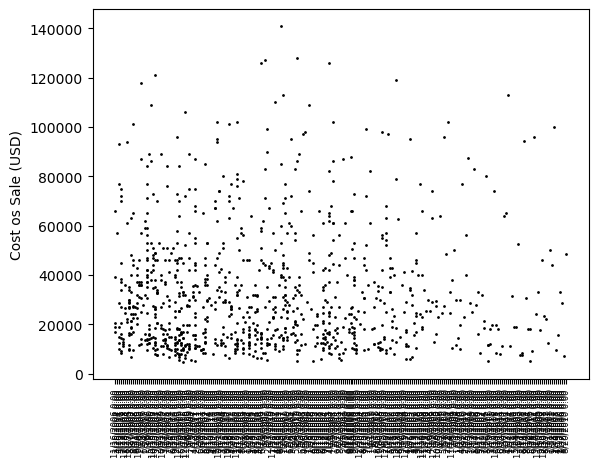

In [9]:
fig, ax = plt.subplots()
ax.scatter(df.saledate[:1000], df.SalePrice[:1000], s=1, c="k")
ax.tick_params(axis='x', labelrotation=90, labelsize=6);
ax.set(ylabel="Cost os Sale (USD)");

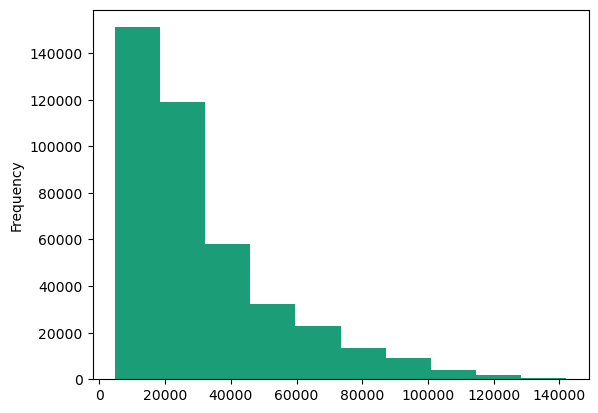

In [10]:
df.SalePrice.plot.hist(cmap="Dark2");

## 4. Data Features

### Parsing Dates

An important feature in the dataset is the sale date.

Using `parse_dates` parameter, `pandas` will know the columns that has dates.

In [11]:
# Import data again, this time parse dates

df = pd.read_csv("data/TrainAndValid.csv", 
                 low_memory=False,
                 parse_dates=["saledate"])

In [12]:
df.saledate.dtype 
# datetime64

dtype('<M8[ns]')

In [13]:
df.saledate[:1000] 
# YYYY-MM-DD

0     2006-11-16
1     2004-03-26
2     2004-02-26
3     2011-05-19
4     2009-07-23
         ...    
995   2009-07-16
996   2007-06-14
997   2005-09-22
998   2005-07-28
999   2011-06-16
Name: saledate, Length: 1000, dtype: datetime64[ns]

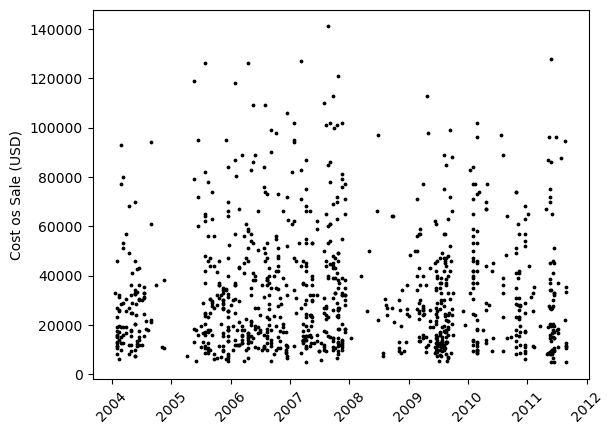

In [14]:
fig, ax = plt.subplots()
ax.scatter(df.saledate[:1000], df.SalePrice[:1000], s=3, c="k")
ax.tick_params(axis='x', labelrotation=45);
ax.set(ylabel="Cost os Sale (USD)");

### Sort DataFrame by saledate

In this case, it is a good idea to sort the data by date.

In [16]:
df.sort_values(by=["saledate"], inplace=True, ascending=True)
df.saledate.head()

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
Name: saledate, dtype: datetime64[ns]

### Make a copy of the original DataFrame

In [17]:
df_tmp = df.copy()

### Add datetime parameters for `saledate` column

In [18]:
df_tmp[:1].saledate.dt.year, df_tmp[:1].saledate.dt.month, df_tmp[:1].saledate.dt.day

(205615    1989
 Name: saledate, dtype: int64,
 205615    1
 Name: saledate, dtype: int64,
 205615    17
 Name: saledate, dtype: int64)

In [19]:
# Create columns related with the date

df_tmp["saleYear"] = df_tmp.saledate.dt.year
df_tmp["saleMonth"] = df_tmp.saledate.dt.month
df_tmp["saleDay"] = df_tmp.saledate.dt.day
df_tmp["saleDayOfWeek"] = df_tmp.saledate.dt.dayofweek
df_tmp["saleDayOfYear"] = df_tmp.saledate.dt.dayofyear

In [20]:
# Drop the column saledate

df_tmp.drop("saledate", axis=1, inplace=True)

In [21]:
# Check values of different US states

df_tmp["state"].value_counts()

Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Montana            1336
Iowa               1336
Oklahoma           1326
Nebraska            866
West Virginia   

### Convert strings into numbers

In [22]:
# Does the column "UsageBand" contains string values?

pd.api.types.is_string_dtype(df_tmp["UsageBand"])

True

In [23]:
# Find all the columns that contains strings

for label, content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [23]:
# Convert the string values of those columns into categories

for label, content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        df_tmp[label] = content.astype("category").cat.as_ordered()
        
# cat.as_ordered() alphabetically ordered
# With this for loop, all the columns containing previoulsy objects 
# have been now converted to categories
# where a numeric value is applied to each category

In [24]:
# Check the changes

df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor       

In [25]:
# See the categories for "states"

df_tmp.state.cat.categories

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'Washington DC', 'West Virginia', 'Wisconsin',
       'Wyoming'],
      dtype='object')

In [26]:
# .cat.codes to see the numerical code for each "state"

df_tmp.state.cat.codes

205615    43
274835     8
141296     8
212552     8
62755      8
          ..
410879     4
412476     4
411927     4
407124     4
409203     4
Length: 412698, dtype: int8

### Save preprocessed data

In [29]:
# Export current tmp DataFrame
df_tmp.to_csv("data/train_tmp.csv", 
              index=False)

In [27]:
# Import preprocessed data
df_tmp = pd.read_csv("data/train_tmp.csv",
                     low_memory=False)

### Fill Missing Values

#### I. Fill numerical missing values

In [29]:
# What are the columns containing numerical values?

for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
saleYear
saleMonth
saleDay
saleDayOfWeek
saleDayOfYear


In [30]:
# Which of these columns have missing values?

for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

auctioneerID
MachineHoursCurrentMeter


In [31]:
# Fill the missing values with the "median" of the column
# Create boolean columns indicating the rows that were missing
    # True for missing

for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            df_tmp[label+"_is_missing"] = pd.isnull(content)
            df_tmp[label] = content.fillna(content.median())
            
# Median is more robust against outliers than mean

In [32]:
# Check the new Columns

df_tmp.head().T

,0,1,2,3,4
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,0.0,0.0,0.0,0.0,0.0
UsageBand,NaN,NaN,NaN,NaN,NaN
fiModelDesc,TD20,A66,D7G,A62,D3B


In [33]:
# How many examples were missing?
    # Expecting auctioneerID_is_missing True for 20136

df_tmp.auctioneerID_is_missing.value_counts()

False    392562
True      20136
Name: auctioneerID_is_missing, dtype: int64

### Fill and Turn Categorical Variables into Numbers

In [36]:
# List the columns containing not numerical values 
    # Previously turned into categories

for label, content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [40]:
# Fill and Turn Categorical Variables into Numbers

for label, content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        df_tmp[label+"_is_missing"] = pd.isnull(content)
        df_tmp[label] = pd.Categorical(content).codes+1

# Turn cat into num and add +1
# +1 to avoid negative values when missing
# turning -1 to 0

In [42]:
df_tmp.head().T

,0,1,2,3,4
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
...,...,...,...,...,...
Backhoe_Mounting_is_missing,False,True,False,True,False
Blade_Type_is_missing,False,True,False,True,False
Travel_Controls_is_missing,False,True,False,True,False
Differential_Type_is_missing,True,False,True,False,True


In [43]:
# Check that there are not missing values

df_tmp.isna().sum()

SalesID                         0
SalePrice                       0
MachineID                       0
ModelID                         0
datasource                      0
                               ..
Backhoe_Mounting_is_missing     0
Blade_Type_is_missing           0
Travel_Controls_is_missing      0
Differential_Type_is_missing    0
Steering_Controls_is_missing    0
Length: 103, dtype: int64

## Modelling

Model-driven EDA <br>
(Event-Driven Architecture)

Try with the <em>Random Forest Regressor</em> model

In [44]:
# The given data was [Training + Validation]
# T+V data will be fractionated
# The Validating data will be the one from 2012

df_val = df_tmp[df_tmp.saleYear == 2012]
df_train = df_tmp[df_tmp.saleYear != 2012]

In [45]:
X_train, y_train = df_train.drop("SalePrice", axis=1), df_train.SalePrice
X_val, y_val = df_val.drop("SalePrice", axis=1), df_val.SalePrice

In [46]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((401125, 102), (11573, 102), (401125,), (11573,))

In [48]:
%%time
model = RandomForestRegressor(n_jobs=-1)

# -1: will use as many cores as posible in my PC

model.fit(X_train, y_train)

CPU times: total: 20min 2s
Wall time: 1min 19s


RandomForestRegressor(n_jobs=-1)

### Building an evaluation metric: RMSLE

The evaluation metric for this competition is the **RMSLE** (root mean squared log error) between the actual and predicted auction prices.

F1-score = RMSE (Root mean squared error) <br>
`mean_squared_log_error` = MSLE

In [58]:
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score

In [59]:
# Create an evaluation function

def rmsle(y_test, y_preds):
    return np.sqrt(mean_squared_log_error(y_test, y_preds))

In [60]:
# Create to evaluate model on different levels

def show_scores(model):
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_val)
    scores = {"Training MAE": mean_absolute_error(y_train, train_preds),
              "Valid MAE": mean_absolute_error(y_val, val_preds),
              "Training RMSLE": rmsle(y_train, train_preds),
              "Valid RMSLE": rmsle(y_val, val_preds),
              "Training R^2": r2_score(y_train, train_preds),
              "Valid R^2": r2_score(y_val, val_preds)}
    return scores

## Testing the model on a subset
### (To tune the hyperparametters)

In [61]:
model = RandomForestRegressor(n_jobs=-1, max_samples=100000)

# max_samples=None, as Default will perform len(X_train) * n_estimators ()
# 40112500 in this case
# This will increase the speed, reduce the time

In [62]:
%%time
model.fit(X_train, y_train);

CPU times: total: 6min 48s
Wall time: 27.7 s


In [63]:
show_scores(model)

{'Training MAE': 3581.999815543783,
 'Valid MAE': 6140.2741717791405,
 'Training RMSLE': 0.17518288004546823,
 'Valid RMSLE': 0.2550071867477332,
 'Training R^2': 0.9392803917393595,
 'Valid R^2': 0.8741618328049784}

## Hyperparameter Tunning

In [75]:
%%time

from sklearn.model_selection import GridSearchCV

rf_grid = {"n_estimators": [100, 125, 150],
           "max_depth": [None, 1, 2],
           "min_samples_split": [1, 2, 5],
           "min_samples_leaf": [1, 2, 5],
           "max_features": [0.2, 0.5, "sqrt"],
           "max_samples": [100000]}

# Instantiate Randomized 
gs_model = GridSearchCV(RandomForestRegressor(n_jobs=-1),
                        param_grid=rf_grid,
                        cv=5,
                        verbose=True)

gs_model.fit(X_train, y_train)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
CPU times: total: 42min 58s
Wall time: 1h 50min 12s


GridSearchCV(cv=5, estimator=RandomForestRegressor(n_jobs=-1),
             param_grid={'max_depth': [None, 1, 2],
                         'max_features': [0.2, 0.5, 'sqrt'],
                         'max_samples': [100000], 'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [1, 2, 5],
                         'n_estimators': [100, 125, 150]},
             verbose=True)

In [76]:
gs_model.best_params_

{'max_depth': None,
 'max_features': 0.5,
 'max_samples': 100000,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 150}

In [77]:
show_scores(gs_model)

{'Training MAE': 3589.8290679297797,
 'Valid MAE': 6076.105726547424,
 'Training RMSLE': 0.17526738560148047,
 'Valid RMSLE': 0.2522666816993946,
 'Training R^2': 0.9398451571036401,
 'Valid R^2': 0.8781950282337725}

### Train the model with the best hyperparameters

In [78]:
%%time

ideal_model = RandomForestRegressor(n_estimators=150,
                                    min_samples_split=2,
                                    min_samples_leaf=1,
                                    max_samples=100000,
                                    max_features=0.5,
                                    max_depth=None,
                                    n_jobs=-1)
ideal_model.fit(X_train, y_train);

CPU times: total: 5min 44s
Wall time: 22.7 s


In [79]:
show_scores(ideal_model)

{'Training MAE': 3586.305874195492,
 'Valid MAE': 6076.7610910452495,
 'Training RMSLE': 0.17500183099597214,
 'Valid RMSLE': 0.2525058107463973,
 'Training R^2': 0.940010737879873,
 'Valid R^2': 0.8783698670279464}

## Make predictions on test data

In [80]:
# Import test data
df_test = pd.read_csv("data/Test.csv",
                      parse_dates=["saledate"])
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN


### Preprocessing the data
#### Same format as training dataset

In [81]:
# A function to preprocess the dataset

def preprocess_data(df):
# Create 5 columns from saledate and remove the original

    df["saleYear"] = df.saledate.dt.year
    df["saleMonth"] = df.saledate.dt.month
    df["saleDay"] = df.saledate.dt.day
    df["saleDayOfWeek"] = df.saledate.dt.dayofweek
    df["saleDayOfYear"] = df.saledate.dt.dayofyear
    df.drop("saledate", axis=1, inplace=True)
# Fill the numeric missing values with median and creates an _is_missing column

    for label, content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                df[label+"_is_missing"] = pd.isnull(content)
                df[label] = content.fillna(content.median())
# Turn the categorical columns with median and creates an _is_missing column

        if not pd.api.types.is_numeric_dtype(content):
            df[label+"_is_missing"] = pd.isnull(content)
            df[label] = pd.Categorical(content).codes+1  
    return df

In [82]:
df_test = preprocess_data(df_test)
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,True
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,True,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,False,True,True,True,True,True
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,False,True,True,True,True,True
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,True,False,False,False,True,True


In [83]:
# Find the columns that differ between the datasets

set(X_train.columns) - set(df_test.columns)

{'auctioneerID_is_missing'}

In [84]:
# Create the missing column in the test dataset

df_test["auctioneerID_is_missing"] = False
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing,auctioneerID_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,False
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,False,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,True,True,True,True,True,False
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,True,True,True,True,True,False
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,False,False,False,True,True,False


In [85]:
# Change the order of df_test columns to fit the one of X_train

df_test = df_test.reindex(columns=X_train.columns)

Now, the test DataFrame has the same features as the training DataFrame

In [86]:
# Make predictions on the test data
test_preds = ideal_model.predict(df_test)

In [87]:
test_preds

array([19178.66666667, 17220.        , 51418.33333333, ...,
       13319.        , 16985.        , 28010.        ])

In [88]:
# Format predictions into the format that kaggle is asking for

df_preds = pd.DataFrame()
df_preds["SalesID"] = df_test["SalesID"]
df_preds["SalesPrice"] = test_preds
df_preds

,SalesID,SalesPrice
0,1227829,19178.666667
1,1227844,17220.000000
2,1227847,51418.333333
3,1227848,68766.666667
4,1227863,53501.333333
...,...,...
12452,6643171,39183.333333
12453,6643173,13695.000000
12454,6643184,13319.000000
12455,6643186,16985.000000


In [89]:
# Export prediction data

df_preds.to_csv("data/test_predictions.csv", index=False)

### Features Importance

Feature importance seeks to figure out which different attributes of the data were most important when it comes to predicting the **target variable** (SalePrice)

In [90]:
importances = ideal_model.feature_importances_

In [91]:
# Function for plotting feature importance

def plot_features(columns, importances, n=20):
    df = (pd.DataFrame({"features": columns,
                        "feature_importances": importances})
          .sort_values("feature_importances", ascending=False)
          .reset_index(drop=True))
    fig, ax = plt.subplots()
    ax.barh(df["features"][:n], df["feature_importances"][:n], color="k")
    ax.set_ylabel("Features")
    ax.set_ylabel("Feature Importance")
    ax.invert_yaxis()

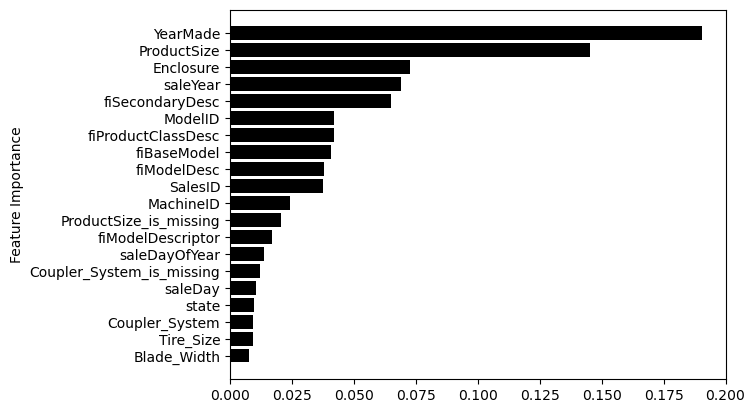

In [92]:
plot_features(X_train.columns, ideal_model.feature_importances_);